In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt

np.set_printoptions(formatter={'float': '{: 0.5f}'.format}, suppress = True)
matplotlib.rcParams.update({'font.size': 12})

# Setup

In [2]:
alpha = 0.70
plot_size = (14,8)
colors = ["#324F61", "#286F74", "#348F79", "#62AD70", "#A3C663", "#EFD85F",]

# File Reading

In [3]:
# Read a file containing one array
def read_file(filename, timeframe="ns"):
    arr = []
    f = open(filename, "r")

    for line in f:
        meas = float(line.replace("\n", ""))
        if timeframe == "ns": 
            arr.append(meas/1000000)
        if timeframe == "ms":
            arr.append(meas)
    
    return np.array(arr)

# Plots

In [4]:
def loglogplot(x, y, xlabel, ylabel):
    fig, ax = plt.subplots()
    fig.set_size_inches(plot_size)
    
    ax.loglog(x, y, '.', alpha=alpha, color=colors[3])

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    
    plt.show()

def boxplot(x, labels, ylabel, title, showfliers=True, yscale="log"):
    fig, ax = plt.subplots()

    plt.ylabel(ylabel)
    plt.title(title)
    
    fig.set_size_inches(plot_size)
    plt.yscale(yscale)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    
    ax.boxplot(x, labels=labels, notch=True, showfliers=showfliers)

def violinplot(x, yscale="log"): # TODO: Maybe check out violin plots in seaborn
    fig, ax = plt.subplots()
    
    fig.set_size_inches(plot_size)
    plt.yscale(yscale)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    
    ax.violinplot(x)

# Determinant of the Covariance Matrix Computation Time 

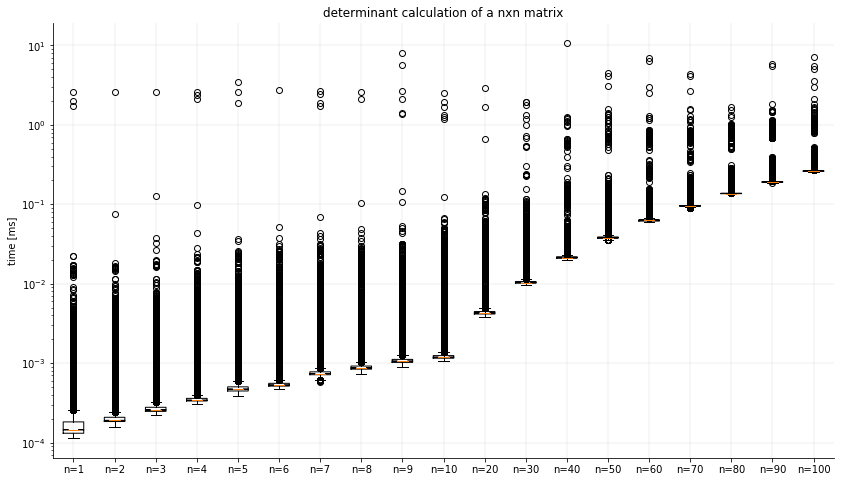

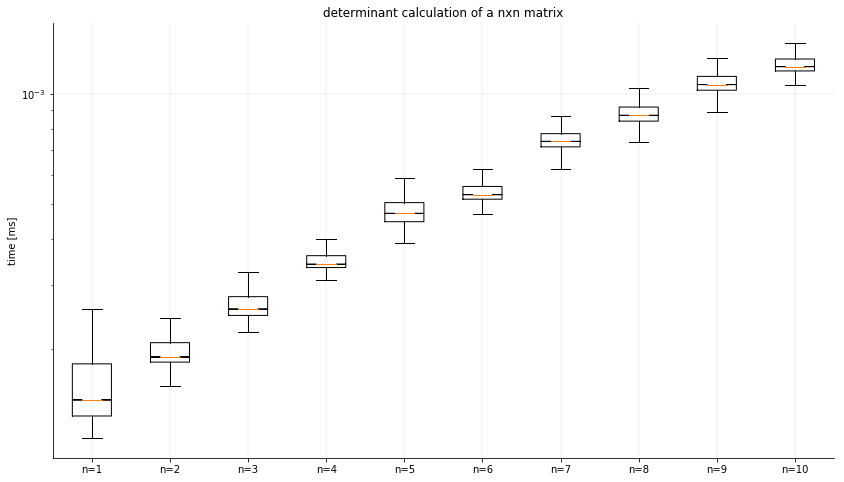

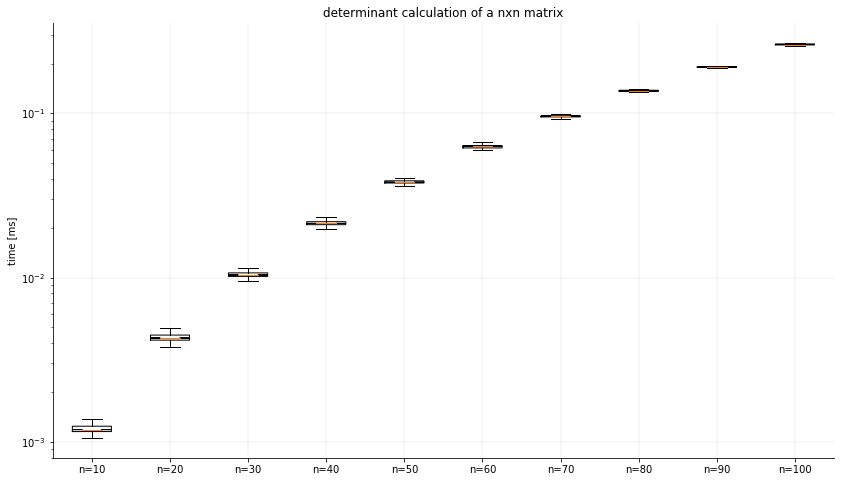

In [7]:
file_names = ["m001", "m002", "m003", "m004", "m005", "m006", "m007", "m008", "m009", "m010", 
              "m020", "m030", "m040", "m050", "m060", "m070", "m080", "m090", "m100"]
labels = ["n=1",  "n=2",  "n=3",  "n=4",  "n=5",  "n=6",  "n=7",  "n=8",  "n=9", "n=10", 
          "n=20", "n=30", "n=40", "n=50", "n=60", "n=70", "n=80", "n=90", "n=100"]

m_arr = []
for file_name in ["det_times_ss-10e6/" + s + ".txt" for s in file_names]:
    m_arr.append(read_file(file_name))

ylabel = "time [ms]"
title  = "determinant calculation of a nxn matrix"

boxplot(m_arr, labels, ylabel, title, showfliers=True, yscale="log")
boxplot(m_arr[:10], labels[:10], ylabel, title, showfliers=False, yscale="log")
boxplot(m_arr[9:], labels[9:], ylabel, title, showfliers=False, yscale="log")